In [2]:
import sys
sys.path.insert(0, '/home/wcmelby/Library/Python/wcmelby-HWP_Characterizations/')
from New_DRRP_Functions import *

In [4]:
flux = np.array([])
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/Reduced_SuperK_Intensity/"
reduced_filename = "Reduced_SuperK_"
lcenter = [316, 247]
rcenter = [316, 324]
maxradius = 20

for filename in sorted(os.listdir(reduced_folder), key = extract_number):
    if filename.startswith(reduced_filename):
        with fits.open(os.path.join(reduced_folder, filename)) as hdul:
            reduced_img_data = hdul[0].data
            ys, xs, = np.indices(reduced_img_data.shape)
            lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
            rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

            lbackground_mask = (lradius > 25) & (lradius < 30)
            rbackground_mask = (rradius > 25) & (rradius < 30)   # Index the background around each spot, take the median value

            background_lmedian = np.median(reduced_img_data[lbackground_mask])
            background_rmedian = np.median(reduced_img_data[rbackground_mask])

            lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
            rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
            flux = np.append(flux, lflux+rflux)
print(flux)

[219079.5  226778.5  209061.   223350.5  208313.5  222806.   216591.5
 209749.5  222554.   211905.5  214455.   213175.   200524.5  218201.
 224770.   209236.   225564.    -3764.   211922.   232658.5  233388.
 210519.   225975.5  220725.   211714.5  227247.5   -8915.   219825.5
 211452.5  223376.5  222369.   228294.   207649.5  220439.   -32275.25
 215565.   207026.   -18727.5  222184.5  218290.5  218146.   205601.
 213758.   224075.5  221735.   223042.   234029.5  213367.5  215988.5
 213445.   217894.   221075.   -34889.75 223292.5  206677.5  213332.
 216634.   225761.5  219929.   220166.5  220649.5  232889.5  220905.75
 209220.5  215903.   212811.5  219698.5  227976.   225510.   231455.
 222126.   231864.   211942.5  216961.   210456.5  218371.   217064.
  -3351.5  224036.5  228723.5  231572.5  223676.   218319.   234109.
 231113.   217665.5  221244.5  211447.   208957.5  210708.   214859.75
 212808.5  -45571.5  218583.5  219767.   219879.   218501.   -32320.75
 227671.   219118.5  21

In [6]:
60*90/20

270.0

In [7]:
def extract_intensities(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff=5000):
    I_left = np.array([])
    I_right = np.array([])
    bad_indices = np.array([])
    times = np.linspace(0, 90, 270)

    for filename in sorted(os.listdir(reduced_folder), key = extract_number):
        if filename.startswith(reduced_filename):
            with fits.open(os.path.join(reduced_folder, filename)) as hdul:
                reduced_img_data = hdul[0].data
                ys, xs, = np.indices(reduced_img_data.shape)
                lradius = np.sqrt((ys-lcenter[0])**2+(xs-lcenter[1])**2)
                rradius = np.sqrt((ys-rcenter[0])**2+(xs-rcenter[1])**2)

                lbackground_mask = (lradius > 20) & (lradius < 26)
                rbackground_mask = (rradius > 20) & (rradius < 26)   # Index the background around each spot, take the median value

                background_lmedian = np.median(reduced_img_data[lbackground_mask])
                background_rmedian = np.median(reduced_img_data[rbackground_mask])

                lflux = np.sum(reduced_img_data[lradius < maxradius] - background_lmedian)   # Now take the flux with the background mask subtracted
                rflux = np.sum(reduced_img_data[rradius < maxradius] - background_rmedian)
                I_left = np.append(I_left, lflux)
                I_right = np.append(I_right, rflux)

                if lflux+rflux < cutoff:
                    print("Warning: low flux detected, check the image " + filename + ", index: " + str(sorted(os.listdir(reduced_folder), key = extract_number).index(filename)))
                    bad_indices = np.append(bad_indices, sorted(os.listdir(reduced_folder), key = extract_number).index(filename))
                else:
                    continue 

    # Makes the array a list of integers that can be used to index the other array
    bad_indices = bad_indices.astype(int)
    # Deletes the bad indices (caused by camera glitch or some other complication) from the data
    I_left = np.delete(I_left, bad_indices)
    I_right = np.delete(I_right, bad_indices)
    new_times = np.delete(times, bad_indices)

    return I_left, I_right, new_times, bad_indices

In [8]:
reduced_filename = 'Reduced_SuperK_'
reduced_folder = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/Reduced_SuperK_Intensity/"
lcenter = [316, 247]
rcenter = [316, 324]
maxradius = 20
cutoff = 50000

extracted_data = extract_intensities(reduced_filename, reduced_folder, lcenter, rcenter, maxradius, cutoff)
Il = extracted_data[0]
Ir = extracted_data[1]
times = extracted_data[2]


In [12]:
I = (Il+Ir)
print(times)

[ 0.          0.33457249  0.66914498  1.00371747  1.33828996  1.67286245
  2.00743494  2.34200743  2.67657993  3.01115242  3.34572491  3.6802974
  4.01486989  4.34944238  4.68401487  5.01858736  5.35315985  6.02230483
  6.35687732  6.69144981  7.0260223   7.3605948   7.69516729  8.02973978
  8.36431227  9.03345725  9.36802974  9.70260223 10.03717472 10.37174721
 10.7063197  11.04089219 11.71003717 12.04460967 12.71375465 13.04832714
 13.38289963 13.71747212 14.05204461 14.3866171  14.72118959 15.05576208
 15.39033457 15.72490706 16.05947955 16.39405204 16.72862454 17.06319703
 17.73234201 18.0669145  18.40148699 18.73605948 19.07063197 19.40520446
 19.73977695 20.07434944 20.40892193 20.74349442 21.07806691 21.41263941
 21.7472119  22.08178439 22.41635688 22.75092937 23.08550186 23.42007435
 23.75464684 24.08921933 24.42379182 24.75836431 25.0929368  25.42750929
 26.09665428 26.43122677 26.76579926 27.10037175 27.43494424 27.76951673
 28.10408922 28.43866171 28.7732342  29.10780669 29.

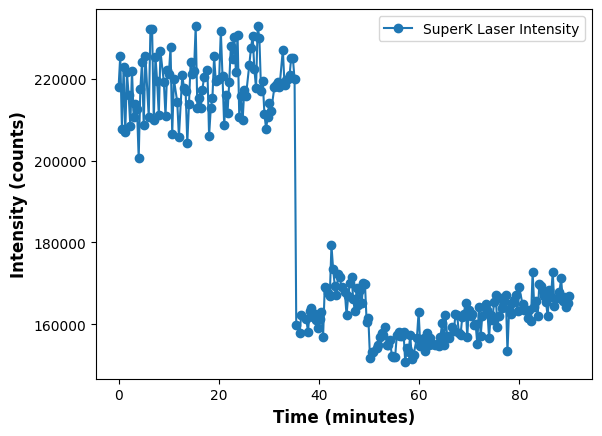

In [18]:
plt.ylabel('Intensity (counts)', fontsize=12, fontweight='bold')
plt.xlabel('Time (minutes)', fontsize=12, fontweight='bold')
plt.plot(times, I, marker='o', linestyle='-', label="SuperK Laser Intensity")
plt.legend()

folder_path = "/home/shared/exoserver/Lab_Data/Mueller_Matrix_Polarimeter/SuperK_Intensity/"
file_name = 'SuperK_Laser_Stability.png'
#plt.savefig(folder_path + file_name, bbox_inches='tight', dpi=300)